---
Projet Déconvolution
====================


**Projet présenté par:**

**Vahé TILDIAN/ Alexandre ROMANO/ Lucas PETIT/ Victoria BOUCHET**

---

# Question 1

Soit $F:t\mapsto \cos(2\pi\omega_0 t)e^{-\frac{(t-0.5)^2}{2\sigma^2}}$ o\`u $\omega_0$ est un entier et $t$ varie dans $[0,1]$, et $\sigma\in\mathbb{R}_+^*$.

On prend dans ce qui suit $\omega_0=20$ et $\sigma=0.1$. 

1. Tracer une représentation graphique de la fonction $F$

Modules PlotLib, Pandas et Numpy bien importés


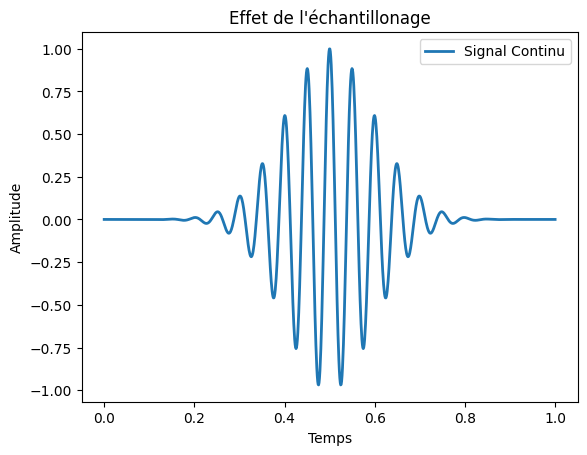

In [1]:
#coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Modules PlotLib, Pandas et Numpy bien importés")

#test representation grpahique, a refaire avec bonnes valeurs
w0 = 20
sigma = 0.1

def f(t):
    "fonction que l'on souhaite représenter"
    return(np.cos(2*np.pi*t*w0))*np.exp(-(np.power(t-0.5,2))/(2*np.power(sigma,2)))

def graph():
    "Représentation graphique de la fonction"
    t= np.linspace(0, 1, 1000) #1000 pour affiner au maximum le graphique
    y = f(t)
    plt.plot(t, y, label="Signal Continu", linewidth=2)
    plt.legend()
    plt.title("Effet de l'échantillonage")
    plt.xlabel("Temps")
    plt.ylabel("Amplitude")

#Prog principal
graph()


2. Superposer sur la première figure le tracé des points $(t_n,u_n)$ en les reliant par des segments de droite en choisissant une première valeur de $f_s$.

Modules PlotLib, Pandas et Numpy bien importés


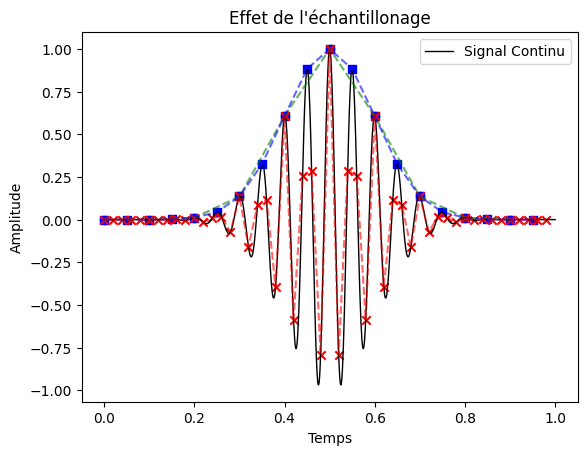

In [2]:
#coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Modules PlotLib, Pandas et Numpy bien importés")

#test representation grpahique, a refaire avec bonnes valeurs
w0 = 20
sigma = 0.1

def f(t):
    "fonction que l'on souhaite représenter"
    return(np.cos(2*np.pi*t*w0))*np.exp(-(np.power(t-0.5,2))/(2*np.power(sigma,2)))

def graph():
    "Représentation graphique de la fonction"
    t= np.linspace(0, 1, 1000) #1000 pour affiner au maximum le graphique
    y = f(t)
    plt.plot(t, y, color= 'black', label="Signal Continu", linewidth=1)
    plt.legend()
    plt.title("Effet de l'échantillonage")
    plt.xlabel("Temps")
    plt.ylabel("Amplitude")

#Afficher l'échantillonage
def sampling(fs, color, mark):
    T = 1/fs #Pour définir les périodes d'échantillonages
    t_sample = np.arange(0, 1, T)
    y_sample = f(t_sample)

    "code pour l'affichage"
    plt.scatter(t_sample, y_sample, color=color, label=f"Echantillonnage pour fs={fs}", marker=mark)
    plt.plot(t_sample, y_sample, color=color, linestyle='dashed', alpha=0.6)


#programme principal
graph()
sampling(fs=10, color='green', mark='o')
sampling(fs=20, color='blue', mark='s')
sampling(fs=50, color='red', mark='x') #valeur au dessus de w0

3.Tracer le même type de figure pour une deuxième valeur de $f_s$, puis une troisième.

Que constatez vous si $f_s\ll 2\omega_0$ ?

- si $f_s\ll 2\omega_0$, on remarque que la fréquence du signal échantilloné est plus basse que le signal d'origine.
  Or, lorsque la fréquence baisse ainsi, cela peut aboutir à une perte d'information rendant la récupération du signal plus compliquée et donc dégradation de ce signal

# Question 2

,1. Télécharger les données sur la page Ametice de l'UE Modélisation (fichiers **y.wav**, **y-original.wav** et **h.txt**)
2. Transformer les données en vecteurs de type Numpy et les visualiser.

# Question 3

L'objectif de cette question est de construire une intuition pour comprendre l'effet sur un signal $x$ d'un opérateur du type $\mathcal{H}$. On pourra s'en servir le cas échéant pour comprendre l'effet sur le son original de l'opérateur qui a donné $y$. Pour cela nous allons d'abord travailler sur des exemples.\\



Dans tout ce qui suit $N$ est un entier pair.

1. On considère $s=\left(\frac{1}{2},\frac{1}{2},0,0\dots,0\right)\in\mathbb{R}^N$ et $\mathcal{S}$ l'opérateur de convolution associé à $s$ au sens de la définition 1. Donner la matrice de $\mathcal{S}$ dans la base canonique et calculer explicitement $\mathcal{S}(x)$ pour un vecteur quelconque $x=(x_0,\dots,x_{N-1})\in\mathbb{R}^N$.

 2. Même question que la précédente en remplaçant $s$ par $t=\left(\frac{1}{3},\frac{1}{3},\frac{1}{3},0,0\dots,0\right)\in\mathbb{R}^N$ en notant $\mathcal{T}$ l'opérateur de convolution associé à $t$ au sens de la définition 1.

3. &#x1F625; Mêmes questions pour $s^{(n)}\in\mathbb{R}^N$ tel que $s^{(n)}_k=\frac{1}{n}$ si $k<n$ et $0$ sinon, en notant $\mathcal{S}^{(n)}$ l'opérateur de convolution associé à $s^{(n)}$ au sens de la définition 1.
4. &#x1F625; &#x1F625; On fixe maintenant $y\in\mathbb{R}^N$ tel que pour tout $k\in\{0,\dots,N-1\}$
     $$
     y_k=\left\{
     \begin{array}{cc}
          k & \textrm{ si } k<N/2  \\
          N-k & \textrm{ sinon.} 
     \end{array}
     \right.
     $$
Calculer à la main pour $n=2,3$ $z=\mathcal{S}^{(n)}(y)$ et tracer en fonction de $k$ les coordonnées $z_k$ de $z$ pour différents $n$ à l'aide de Python. Que constatez-vous ? Quel est d'après vous l'effet de l'opérateur $\mathcal{S}^{(n)}$ sur $y$ quand $n$ augmente ?            
5. &#x1F625; De quelle nature est l'opérateur $Id-\mathcal{S}^{(n)}$ ? Quel est son effet sur un signal $x$ ?
       

# Question 4

1. Placer $1$, $\zeta$, $\zeta^2$ dans le plan complexe.

2. Calculer $1+\zeta+\zeta^2$ et $\zeta^3$.

3. Calculer $J^3$.

4. Montrer qu'une base de vecteurs propres de $J$ est constituée de la base $\mathcal{E}$.

5. Montrer que $H$ peut s'écrire comme une combinaison linéaire des matrices $Id$, $J$ et $J^2$ et en déduire les valeurs propres notées $\{\hat{h}_0,\hat{h}_1,\hat{h}_2\}$ de $H$. Donner une base de vecteurs propres associée.

On note $D$ la matrice diagonale $D=\left(
\begin{array}{ccc}
\hat{h}_0&0&0\\
0&\hat{h}_1&0\\
0&0&\hat{h}_2
\end{array}
\right)$ et on suppose dans toute la suite que $D$ est inversible.

6. Calculer $PP^*$ et en déduire $P^{-1}$ en fonction de $P^*$.

7. Soient $x$ et $y$ tels que (2) soit vérifiée.

 Calculer $\hat{y}=P^*y$ en fonction de $\hat{x}=P^*x$, et de $D$.

Calculer la solution $x$ du système (2) en fonction de $\hat{y}$, $P$, $N$ et $D^{-1}$.

# Question 5 &#x1F625;

1. Tracer les $\omega_\ell$ dans le plan complexe pour $N=4$, $N=6$ et $N=8$.
2. Démontrer la Proposition 1.
3. Démontrer le Théorème 1.

# Question 6

1. Démontrer que le nombre d'opérations du calcul naïf de $\hat y$ est bien de l'ordre de $2N^2$.

2. &#x1F625; Mettre en évidence expérimentalement la différence de temps de calcul entre le calcul naïf de $\hat y$ et son calcul à l'aide des fonctions fft/ifft de Numpy.
3. &#x1F625;&#x1F625; Détailler l'algorithme de la transformée de Fourier rapide.

# Question 7

1. En utilisant les résultats du théorème 1 restaurer avec Python le son $y=Hx$ pour obtenir $u=x$.

2. Commenter l'effet que le filtre a sur le son $u$ à l'oreille. Décrire une situation concrète dans laquelle ce type de filtre pourrait être utilisé. 